In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
df = df.drop(columns=['User ID'], errors='ignore')

In [4]:
if 'Gender' in df.columns:
    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [5]:
print("\nColumns available:", df.columns)


Columns available: Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [6]:
target_col = 'Purchased'
if target_col not in df.columns:
    df.columns = df.columns.str.strip()
    if target_col not in df.columns:
        print(f"⚠️ Target column '{target_col}' not found. Available:", df.columns)
    else:
        y = df[target_col]
else:
    y = df[target_col]

X = df.drop(columns=[target_col])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [8]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
print("\nCustomer Purchase Prediction Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Customer Purchase Prediction Metrics:
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100

ROC-AUC Score: 0.9643929643929644


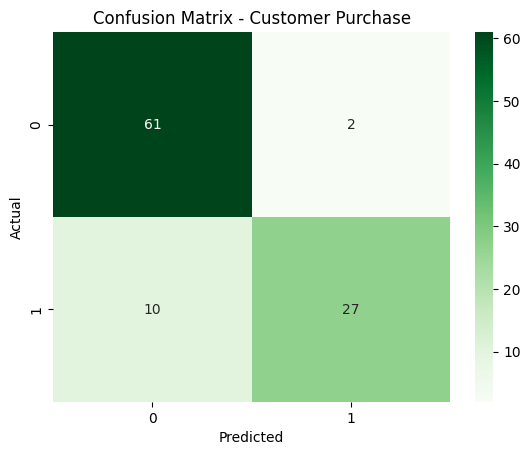

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Customer Purchase")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

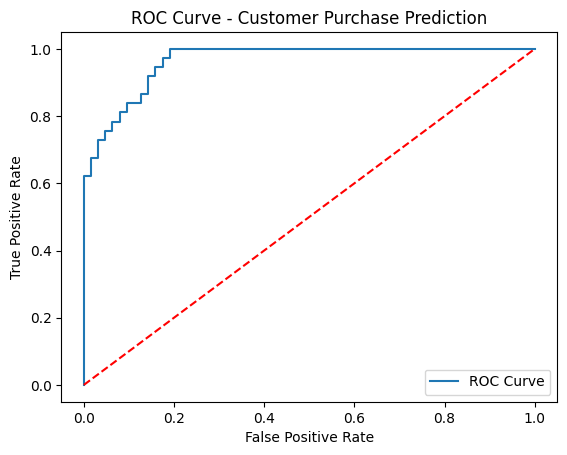

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Purchase Prediction")
plt.legend()
plt.show()